Alumno: David Elías Panigo\
Evaluación 02\
MAIE 2022

# Sistema de 3 ecuaciones diferenciales ordinarias de primer orden.
<font color='blue'>Comenzamos cargando las librerias que vamos a utilizar.\
Detallo también por si me hace falta una cantidad de decimales para redondear mis resultados.</font>

In [2]:
# Evaluacion02
# Alumno: David Elias Panigo
###########################################

%matplotlib inline
%matplotlib notebook

###########################################################################################
# Importamos los modulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math

# Redondeo general
decimales = 4

# a) Realiza un programa para resolver un sistema de 3 ecuaciones diferenciales ordinarias de primer orden utilizando el método de integración de Euler.

<font color='blue'> Defino a las tres ecuaciones diferenciales como 3 funciones por separado.\
Y para trabajar defino una función de integración de Euler como euelr3D(), y una función para poder desarrollar algo que se me ocurrió para comparar diferentes integraciones, que es una función que va a calcular distancias en tres dimensiones como distancias3D(). Más adelante detallo para que uso esta función que calcula distancias, en el item f.</font>

In [3]:

# Definicion de Funciones

# Primera Ecuacion Diferencial
def fn01(x,y):
    derivada1 = 10*(y - x)
    return derivada1

# Segunda Ecuacion Diferencial
def fn02(x, y, z):
    derivada2 = 28*x - y - x*z
    return derivada2

# Tercera Ecuacion Diferencial
def fn03(x, y, z):
    derivada3 = x*y -(8/3)*z
    return derivada3


# Euler para 3 variables
def euler3D(fn01, fn02, fn03,t0, tf, x0, y0, z0, h = 0.01):
    
    # Cantidad de intervalos y de marcas
    n = int((tf-t0)/h)
    marcas = n + 1

    # Generamos una lista con los tiempos
    t = list(np.linspace(t0, tf, marcas))

    estimados_x = [x0]
    estimados_y = [y0]
    estimados_z = [z0]
  

    for i in range(len(t)-1):
        anterior_x = estimados_x[i] 
        anterior_y = estimados_y[i] 
        anterior_z = estimados_z[i]

        pendiente1 = fn01(anterior_x, anterior_y) 
        pendiente2 = fn02(anterior_x, anterior_y, anterior_z)
        pendiente3 = fn03(anterior_x, anterior_y, anterior_z)
        
        nuevo_x = anterior_x + (pendiente1*h)  
        nuevo_y = anterior_y + (pendiente2*h)
        nuevo_z = anterior_z + (pendiente3*h)

        estimados_x.append(nuevo_x)
        estimados_y.append(nuevo_y)
        estimados_z.append(nuevo_z)

    # Return Exitoso
    return [t, estimados_x, estimados_y, estimados_z]



# Calculo de distancias pitagoricas
def distancia3D(coordenadas3D):
    x = coordenadas3D[0]
    y = coordenadas3D[1]
    z = coordenadas3D[2]

    distancia = [0]

    for k in range(len(x)-1):
        delta_x = x[k+1] - x[k]
        delta_y = y[k+1] - y[k]
        delta_z = z[k+1] - z[k]

        nuevo_segmento = (delta_x**2 + delta_y**2 + delta_z**2)**(1/2) 
        distancia.append(nuevo_segmento)

    return distancia


# b) Utiliza este programa para integrar numericamente las ecuaciones de Lorenz
<font color='blue'>Las raíces del sistema las obtuve a mano. Tengo los cálculos en papel. Si me lo permite el aula virtual, anexo los cálculos.\
Defino diferentes valores iniciales del sistema. El (0, 1, 0) es solicitado en la consiga, los otros valores iniciales fueron definidos por mi.\
Defino también tiempo inicial (t0), tiempo final (tf), delta de tiempo (h), e inicializo un objeto que va a contener 
todas las integraciones de Euler (calculos).</font>

In [4]:
# # Objetos necesarios

# Raices del sistema
# Fueron calculadas a mano
raices = [[0,0,0], [math.sqrt(72), math.sqrt(72), 27], [-math.sqrt(72), -math.sqrt(72), 27]]

# Diferentes valores iniciales para x, y, z
diferentes_x0 = [0, -1, 1,  3]
diferentes_y0 = [1,  1, 1, -3]
diferentes_z0 = [0,  1, 1,  3]


# Valores para las funciones y automatizacion
t0 = 0 # Tiempo inicial
tf = 50 # Tiempo final
h = 0.01 # Delta t

# Cantidad de calculos que seran llevados a cabo
calculos = list(np.arange(0, len(diferentes_x0), 1))
print(calculos)

[0, 1, 2, 3]


<font color='blue'>Se llevan a cabo 4 modelos en total. El primero corresponde al estado inicial recomendado apra resarrollar el práctico en el punto c) Los otros 3 valores fueron asignados por mi para probar diferentes condiicones iniciales.\
A continuación, genero un bucle for que realiza las estimaciones para todas las condiciones iniciales.</font>

In [5]:
# Todos los calculos de Euler
for i in range(len(diferentes_x0)):
    calculos[i]  = euler3D(fn01 = fn01, fn02 = fn02, fn03 = fn03, t0 = t0, tf = tf, x0 = diferentes_x0[i], y0 = diferentes_y0[i], z0 = diferentes_z0[i], h = h)


# c) Comenzando con la condición inicial x(0) = 0, y(0) = 1 y z(0) = 0:

# c1) Grafica la solución x(t), y(t) y z(t).

<font color='blue'>Se grafican las 3 variables para la integración de Euler para t0 = 0, tf = 50 y h = 0.01.\
Se colocarán las 3 variables en 3 graficos diferentes en función del tiempo, y luego las 3 variables superpuestas en un mismo gráfico.
\
    En este último gráfico hay que detallar que la variable x e y se superponen en gran medida.</font>

<IPython.core.display.Javascript object>


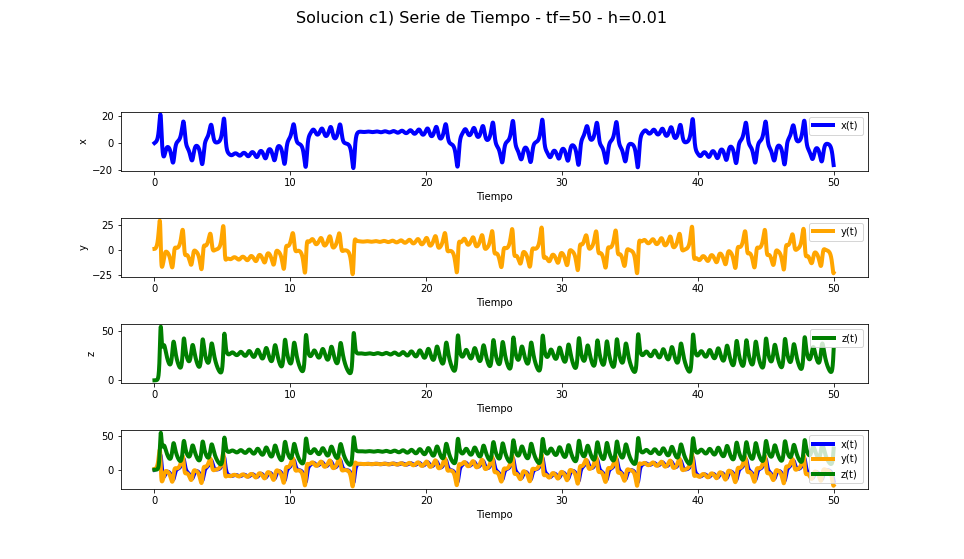

In [6]:
# Solucion c1)  Grafica la solucion x(t), y(t) y z(t).

# Rótulo del eje X de cada grafico
armado1 = "x(t)"
armado2 = "y(t)"
armado3 = "z(t)"

# Titulo
armado4 = str("Solucion c1) Serie de Tiempo") + str(' - tf=') + str(tf) + str(' - h=') + str(h) 

# Definicion de la figura y subplots
fig, ax = plt.subplots(figsize = (16, 6), nrows = 4, ncols = 1)

# Colocalos el titulo general
fig.suptitle(armado4, fontsize=16)

# Damos espacio entre los subplots
plt.subplots_adjust(top=0.8, wspace=0.5, hspace = 0.8)

# Detallamos al grafico 0: Variable X en funcion del tiempo
ax[0].plot(calculos[0][0], calculos[0][1], label = armado1, linewidth = 4, color = 'b')
ax[0].legend(loc = 0)
ax[0].set_ylabel('x')
ax[0].set_xlabel('Tiempo')

# Detallamos al grafico 1: Variable Y en funcion del tiempo
ax[1].plot(calculos[0][0], calculos[0][2], label = armado2, linewidth = 4, color = 'orange')
ax[1].legend(loc = 0)
ax[1].set_ylabel('y')
ax[1].set_xlabel('Tiempo')


# Detallamos al grafico 2: Variable Z en funcion del tiempo
ax[2].plot(calculos[0][0], calculos[0][3], label = armado3, linewidth = 4, color = 'g')
ax[2].legend(loc = 0)
ax[2].set_ylabel('z')
ax[2].set_xlabel('Tiempo')


# Detallamos al grafico 3: X,Y,Z en funcion del tiempo
ax[3].plot(calculos[0][0], calculos[0][1], label = armado1, linewidth = 4, c = 'b')
ax[3].plot(calculos[0][0], calculos[0][2], label = armado2, linewidth = 4, c = 'orange')
ax[3].plot(calculos[0][0], calculos[0][3], label = armado3, linewidth = 4, c = 'green')
ax[3].legend(loc = 0)
ax[3].set_xlabel('Tiempo')
plt.show()

# c2) Realiza gráficos de la trayectoria en los tres planos coordenados (x − z), (x − y) y (z − y).

<font color='blue'>Para resaltar las diferentes entre cada gráfico, se grafica desde el tiempo 0 hasta el tiempo 12.\
Se detallan dentro de los gráficos las raíces como puntos rojos. </font>

<IPython.core.display.Javascript object>


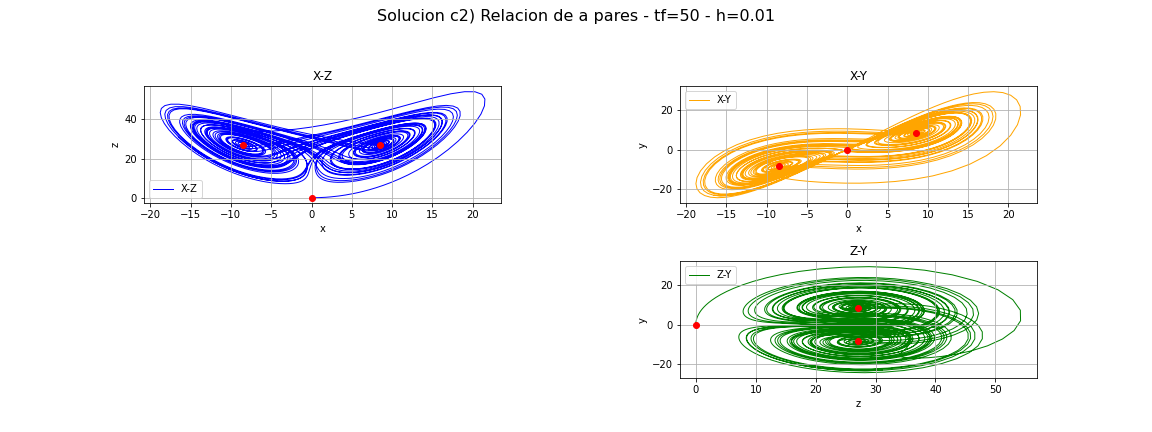

In [7]:
# Solucion c2) X-Z, X-Y, Z-Y

# Titulos de cada grafico
armado1 = "X-Z"
armado2 = "X-Y"
armado3 = "Z-Y"

# Titulo general
armado4 = str("Solucion c2) Relacion de a pares") + str(' - tf=') + str(tf) + str(' - h=') + str(h)

# Definimos un limite
limite = 12
vector_limite = range(limite)

# Creamos un espacio gráfico de 2x2.
fig, ax = plt.subplots(figsize = (16, 6), nrows = 2, ncols = 2)

# Definimos el titulo general
fig.suptitle(armado4, fontsize=16)

# Definimos el espacio entre graficos
plt.subplots_adjust(top=0.8, wspace=0.5, hspace = 0.5)

# Grafico X-Z
ax[0,0].set_title(armado1)
ax[0,0].plot(calculos[0][1], calculos[0][3], label = armado1, linewidth = 1, c = 'b', zorder = 1)
ax[0,0].legend(loc = 0)
ax[0,0].grid()
ax[0,0].set_xlabel('x')
ax[0,0].set_ylabel('z')
for i in range(len(raices)):
    ax[0,0].scatter(raices[i][0], raices[i][2], c ='r', marker='o', zorder = 2) # ax.scatter(raices, c ='r', marker='o')

# Grafico X-Y
ax[0,1].set_title(armado2)
ax[0,1].plot(calculos[0][1], calculos[0][2], label = armado2, linewidth = 1, c = 'orange', zorder = 1)
ax[0,1].legend(loc = 0)
ax[0,1].grid()
ax[0,1].set_xlabel('x')
ax[0,1].set_ylabel('y')
for i in range(len(raices)):
    ax[0,1].scatter(raices[i][0], raices[i][1], c ='r', marker='o', zorder = 2) # ax.scatter(raices, c ='r', marker='o')

# Grafico Z-Y
ax[1,1].set_title(armado3)
ax[1,1].plot(calculos[0][3], calculos[0][2], label = armado3, linewidth = 1, c = 'green', zorder = 1)
ax[1,1].legend(loc = 0)
ax[1,1].grid()
ax[1,1].set_xlabel('z')
ax[1,1].set_ylabel('y')
for i in range(len(raices)):
    ax[1,1].scatter(raices[i][2], raices[i][1], c ='r', marker='o', zorder = 2) # ax.scatter(raices, c ='r', marker='o')

# El grafico 4, lo dejamos como espacio vacio
ax[1,0].axis('off')
plt.show()

# c3) Grafica la trayectoria en el espacio de la fases tridimensional.
<font color='blue'>Se genera un gráfico 3D. Es posible interactuar con el mouse sobre el gráfico para hacerlo rotar.\
En rojo se detallan las tres racíces del sistema. En azul la integración de Euler. </font>

<IPython.core.display.Javascript object>


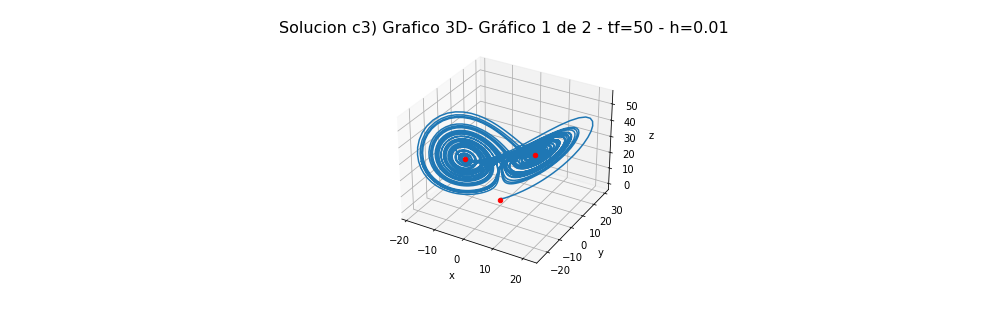

In [8]:
# Solucion c3) Grafico 3D

# Titulo general
armado4 = str("Solucion c3) Grafico 3D- Gráfico 1 de 2") + str(' - tf=') + str(tf) + str(' - h=') + str(h)
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_title(armado4, fontsize=16)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot3D(calculos[0][1], calculos[0][2], calculos[0][3])
for i in range(len(raices)):
    ax.scatter(raices[i][0], raices[i][1], raices[i][2], c ='r', marker='o') # ax.scatter(raices, c ='r', marker='o')
plt.show()

<font color='blue'>El gráfico a continuación presenta el mismo detalle que el anterior, pero se agregó como un punto verde a los valores iniciales del sistema y como un punto negro al la posición final del sistema luego de tiempo establecido.</font>

<IPython.core.display.Javascript object>


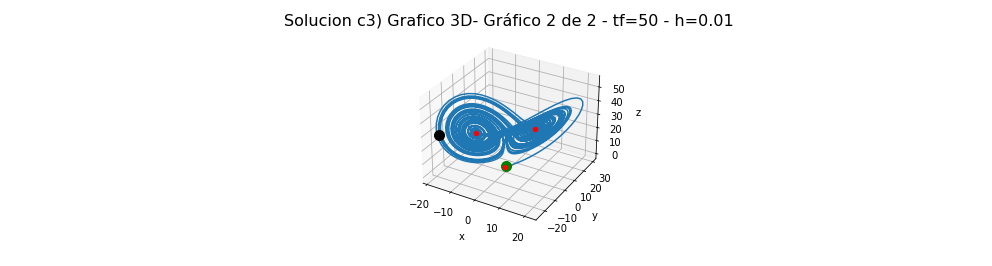

In [9]:
# Solucion c3) Grafico 3D con colores
armado4 = str("Solucion c3) Grafico 3D- Gráfico 2 de 2") + str(' - tf=') + str(tf) + str(' - h=') + str(h)

# Creacion del margo de la figura
fig = plt.figure()

# Creacion de un grafico 3D
ax = plt.axes(projection="3d")
ax.set_title(armado4, fontsize=16) # Titulo
ax.set_xlabel('x') # Eje X
ax.set_ylabel('y') # Eje Y
ax.set_zlabel('z') # Eje Z

ax.plot3D(calculos[0][1], calculos[0][2], calculos[0][3]) # Todo el espiral
ax.scatter(diferentes_x0[0], diferentes_y0[0], diferentes_z0[0], c ='g', marker='o', s = 100) # Punto inicial
ax.scatter(calculos[0][1][-1], calculos[0][2][-1], calculos[0][3][-1], c ='black', marker='o', s = 100) # Punto final

# Las raices del sistema
for i in range(len(raices)):
    ax.scatter(raices[i][0], raices[i][1], raices[i][2], c ='r', marker='o')
    
# Generamos el grafico   
plt.show()

# d) Realiza el diagrama de fases del problema usando al menos 3 condiciones iniciales diferentes. Para cada una de estas trayectorias realiza los graficos de x(t), y(t) y z(t). \
# Grafica las soluciones con colores diferentes.


<font color='blue'>Presento 3 condiciones iniciales del sistema en 3 colores sobre un mismo gráfico 3D. Luego separo las 3 condiciones en 3 gráficos diferentes, y finalmente presento los gráficos de cada variable en función del tiempo.\
Para que se noten mejor las diferencias entre las 3 integraciones se trabaja con un tiempo final de 12.</font>

<IPython.core.display.Javascript object>


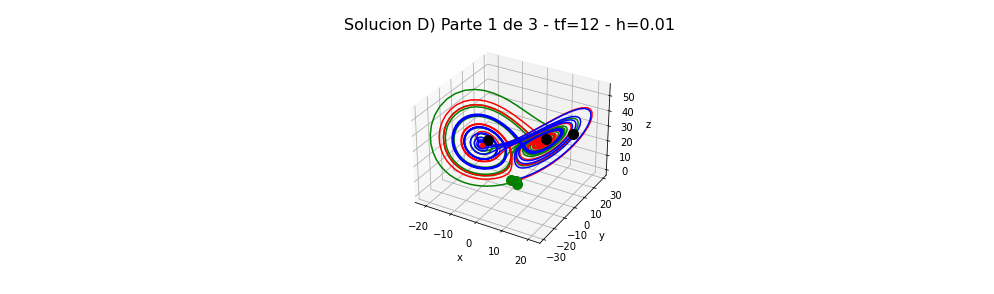

In [10]:
# Solucion D) Parte 1 de 3

# Definimos algunas cosas para solo utilizar los calculos hasta tiempo 12.
tiempo_limite = 12
pos_limite = calculos[0][0].index(12)
cantidad = len(calculos) - 1
vector = list(np.arange(1, (cantidad+1), 1))


# Titulo
armado4 = str("Solucion D) Parte 1 de 3") + str(' - tf=') + str(tiempo_limite) + str(' - h=') + str(h)

# Generamos el grafico
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_title(armado4, fontsize=16)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


# Colocamos cada integracion
ax.plot3D(calculos[1][1][0:pos_limite], calculos[1][2][0:pos_limite], calculos[1][3][0:pos_limite], c = "g")
ax.plot3D(calculos[2][1][0:pos_limite], calculos[2][2][0:pos_limite], calculos[2][3][0:pos_limite], c = "r")
ax.plot3D(calculos[3][1][0:pos_limite], calculos[3][2][0:pos_limite], calculos[3][3][0:pos_limite], c = "b")

# Colocalos las raices del sistema
for j in range(len(raices)):
    ax.scatter(raices[j][0], raices[j][1], raices[j][2], c ='r', marker='o') 

# Colocamos los puntos iniciales y finales
for i in vector:
    ax.scatter(diferentes_x0[i], diferentes_y0[i], diferentes_z0[i], c ='g', marker='o', s = 100) # Punto inicial
    ax.scatter(calculos[i][1][pos_limite], calculos[i][2][pos_limite], calculos[i][3][pos_limite], c ='black', marker='o', s = 100) # Punto final
plt.show()

<font color='blue'>Para apreciar mejor las diferencias gráficamente se generan a continuación tres gráficos diferentes 3D.</font>

<IPython.core.display.Javascript object>


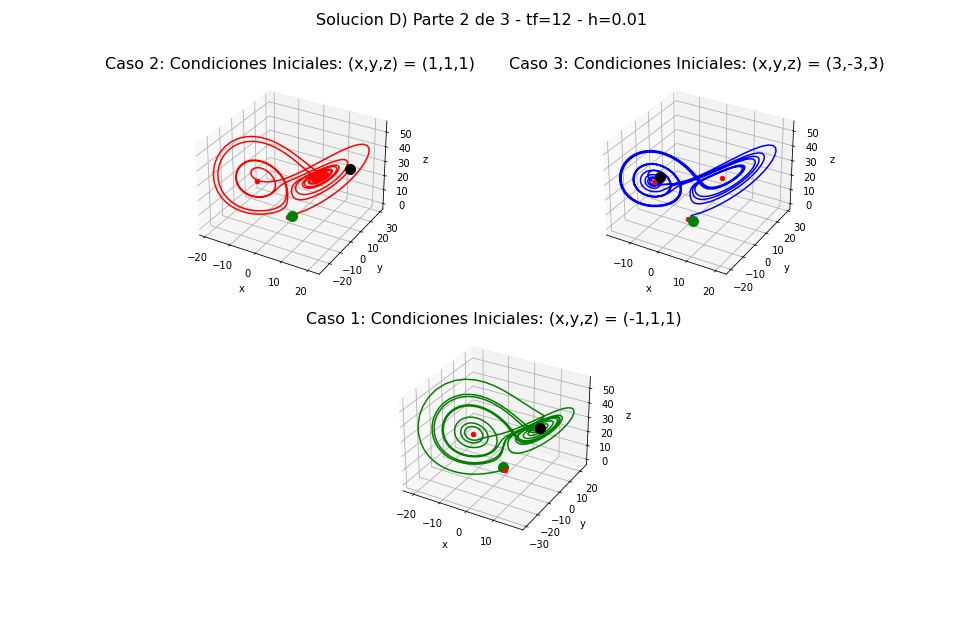

In [11]:
# Solucion D) Parte 2 de 3

# Definimos el titulo
armado4 = str("Solucion D) Parte 2 de 3") + str(' - tf=') + str(tiempo_limite) + str(' - h=') + str(h)


# Generamos el grafico
fig = plt.figure()

# Definimos la posicion de cada grafico 3D y otros detealles
posicion = [[2,1,2], [2,2,1], [2,2,2]]
colores = ["g", "r", "b"]
cantidad = len(calculos) - 1
vector = list(np.arange(1, (cantidad+1), 1))

# Colocamos cada grafico
for i in vector:
    armado5 = str("Caso ") + str(i) + str(": Condiciones Iniciales: (x,y,z) = (") + str(diferentes_x0[i]) + "," + str(diferentes_y0[i]) + "," + str(diferentes_z0[i]) + str(")") 

    ax = fig.add_subplot(posicion[i-1][0], posicion[i-1][1],posicion[i-1][2], projection='3d')
    ax.set_title(armado5, fontsize=16)
    # ax.set_title(str(i), fontsize=16)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot3D(calculos[i][1][0:pos_limite], calculos[i][2][0:pos_limite], calculos[i][3][0:pos_limite], c = colores[i-1])
    ax.scatter(diferentes_x0[i], diferentes_y0[i], diferentes_z0[i], c ='g', marker='o', s = 100) # Punto inicial
    ax.scatter(calculos[i][1][pos_limite], calculos[i][2][pos_limite], calculos[i][3][pos_limite], c ='black', marker='o', s = 100) # Punto final
    
    # Colocamos las raices del sistema
    for j in range(len(raices)):
        ax.scatter(raices[j][0], raices[j][1], raices[j][2], c ='r', marker='o') # Las soluciones del sistema
        
# Detallamos el titulo de cada grafico
fig.suptitle(armado4, fontsize=16)

# Salida grafica
plt.show()


<IPython.core.display.Javascript object>


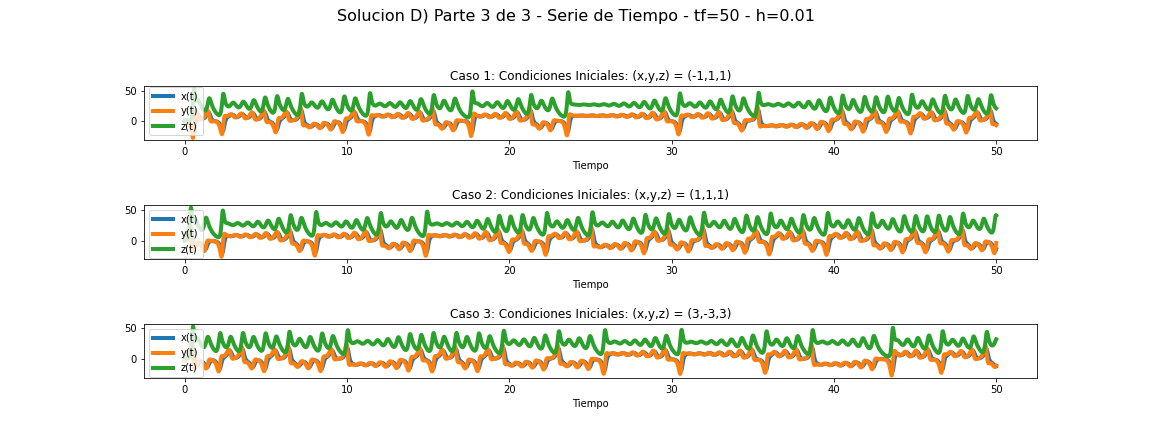

In [12]:
# Solucion D) Parte 3 de 3

#  Grafica la solucion x(t), y(t) y z(t) para otras soluciones
armado1 = "x(t)"
armado2 = "y(t)"
armado3 = "z(t)"
armado4 = str("Solucion D) Parte 3 de 3 - Serie de Tiempo") + str(' - tf=') + str(tf) + str(' - h=') + str(h)
cantidad = len(calculos) - 1
vector = list(np.arange(1, (cantidad+1), 1))

# Generamos el espacio grafico
fig, ax = plt.subplots(figsize = (16, 6), nrows = cantidad, ncols = 1)

# Definimos distancias entre grafiacos
plt.subplots_adjust(top=0.8, wspace=0.5, hspace = 1.2)

# definimos un titulo general
fig.suptitle(armado4, fontsize=16)


# Graficamos todas las variables en todos los graficos
for i in vector:
    armado5 = str("Caso ") + str(i) + str(": Condiciones Iniciales: (x,y,z) = (") + str(diferentes_x0[i]) + "," + str(diferentes_y0[i]) + "," + str(diferentes_z0[i]) + str(")") 
    # ax[i-1].set_title(armado5)
    ax[i-1].set_title(armado5)
    ax[i-1].plot(calculos[i][0], calculos[i][1], label = armado1, linewidth = 4)
    ax[i-1].plot(calculos[i][0], calculos[i][2], label = armado2, linewidth = 4)
    ax[i-1].plot(calculos[i][0], calculos[i][3], label = armado3, linewidth = 4)
    ax[i-1].set_xlabel('Tiempo')
    ax[i-1].legend(loc = 0)
    
# Salida grafica
plt.show()

# e) Teniendo en cuenta los resultados de los puntos anteriores... ¿que le ocurre al sistema cuando se inicializa con condiciones levemente diferentes?


<font color='blue'>Rta: definido para todas las integraciones un mismo tiempo inicial, tiempo final y "delta t", ante pequeños cambios en las condiciones iniciales, el sistema termina en lugares muy diferentes.\
El sistema es sumamente sensible a la condición inicial.</font>

# f) Elegí una condición inicial y analiza cómo influye la elección del paso de integración.
<font color='blue'> Para realizar este análisis de manera correcta se selecciona una única condición incial, se define tiempo inicial y final y solo se cambia el "delta t" (h). Se utilizarán tres valores de h diferentes.\ 
    Para maximizar la visualización de las diferencias, se utiliza tf = 12.\    

<font color='blue'>El análisis se realizará en 3 instancias.</font>\
<font color='blue'>1) Relacion de cada variable respecto al tiempo para diferentes valores de h.\
2) Diagrama de fase para los diferentes valores de h.\
3) Estimación del 'Ovillo de lana': distancia recorrida. \
    \
P.D: 'Ovillo de lana' es un nombre gracioso que elegí para darle a algo que seguramente tiene un nombre más técnico, pero es la idea que se me ocurrió. Sería la distancia recorrida desde el valor inicial en el tiempo inicial hasta la posición final en el tiempo final pasando por el recorrido en cada punto de las estiamciones realizadas de Euler. A lo mejor el nombre es distancia pitagórica o distancia chi cuadrado, pero no estoy seguro. Lo que quiero hacer es estimar el recorrido en cada integración que llevan al estado inicial al estado final y comparar esa distancia entre diferentes integraciones en las que solo difiere el valor de h elegido. </font>

<IPython.core.display.Javascript object>


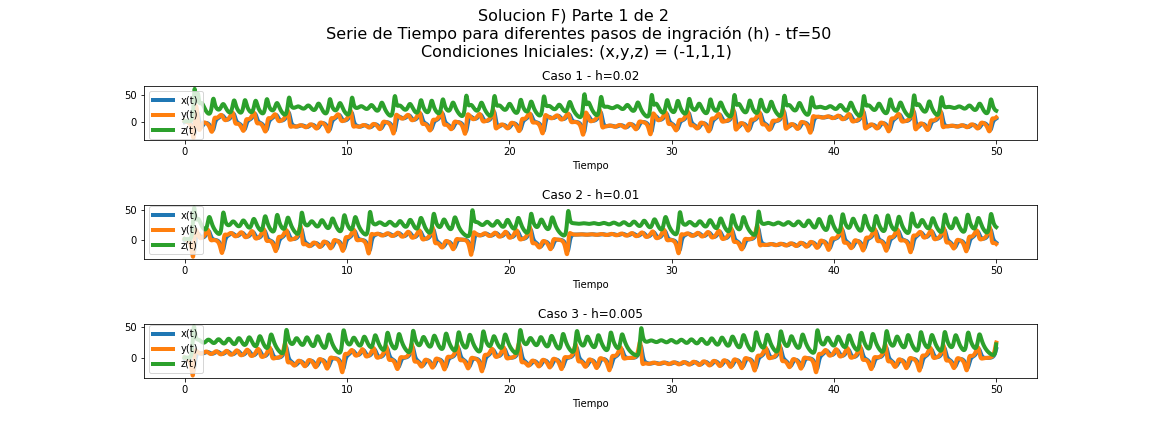

In [13]:

# Diferentes valores de h
h_mod = [0.020, 0.010, 0.005]

# Inicializamos "calculos_mod"
calculos_mod = list(np.arange(0, len(h_mod), 1))

# Doy un valor fijo, que hace referencia a cual de los valores inciales se usara para generar la comparacion ante
# diferentes valores de h que se usaran
valor_fijo = 1

# Todos los calculos de Euler para este nuevo caso
for i in range(len(h_mod)):
    calculos_mod[i]  = euler3D(fn01 = fn01, fn02 = fn02, fn03 = fn03, t0 = t0, tf = tf, x0 = diferentes_x0[valor_fijo], y0 = diferentes_y0[valor_fijo], z0 = diferentes_z0[valor_fijo], h = h_mod[i])




# Solucion D) Parte 3 de 3
#  Grafica la solucion x(t), y(t) y z(t) para otras soluciones
armado1 = "x(t)"
armado2 = "y(t)"
armado3 = "z(t)"
armado4 = str("Solucion F) Parte 1 de 2 \n Serie de Tiempo para diferentes pasos de ingración (h)") + str(' - tf=') + str(tf) + str("\n") + str("Condiciones Iniciales: (x,y,z) = (") + str(diferentes_x0[valor_fijo]) + "," + str(diferentes_y0[valor_fijo]) + "," + str(diferentes_z0[valor_fijo]) + str(")") 
cantidad_mod = len(calculos_mod)
vector_mod = list(np.arange(1, (cantidad_mod+1), 1))

# Generamo el espacio grafico
fig, ax = plt.subplots(figsize = (16, 6), nrows = cantidad_mod, ncols = 1)

# Definimos la distancia entre graficos
plt.subplots_adjust(top=0.8, wspace=0.5, hspace = 1.2)

# Damos titulo general
fig.suptitle(armado4, fontsize=16)


# Colocamos todas las variables de todas las integraciones para diferentes valores de h
for i in range(len(calculos_mod)):
    armado5 = str("Caso ") + str(i + 1) + str(" - h=") + str(h_mod[i])
    # ax[i-1].set_title(armado5)
    ax[i].set_title(armado5)
    ax[i].plot(calculos_mod[i][0], calculos_mod[i][1], label = armado1, linewidth = 4)
    ax[i].plot(calculos_mod[i][0], calculos_mod[i][2], label = armado2, linewidth = 4)
    ax[i].plot(calculos_mod[i][0], calculos_mod[i][3], label = armado3, linewidth = 4)
    ax[i].set_xlabel('Tiempo')
    ax[i].legend(loc = 0)
plt.show()

<IPython.core.display.Javascript object>


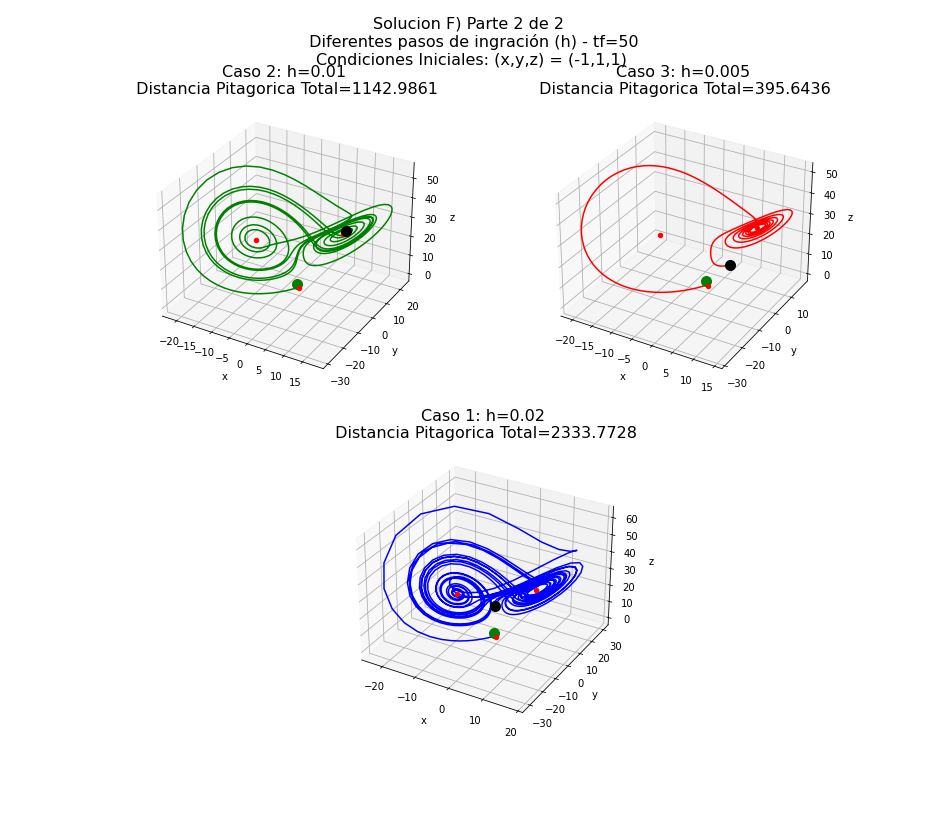

In [14]:
# Solucion D) Parte 2 de 3

# Hacemos una seleccion de las integraciones, solo hasta el tiempo limite (que es 12)
coordenadas3D01 = [calculos_mod[0][1][0:pos_limite], calculos_mod[0][2][0:pos_limite], calculos_mod[0][3][0:pos_limite]] 
coordenadas3D02 = [calculos_mod[1][1][0:pos_limite], calculos_mod[1][2][0:pos_limite], calculos_mod[1][3][0:pos_limite]] 
coordenadas3D03 = [calculos_mod[2][1][0:pos_limite], calculos_mod[2][2][0:pos_limite], calculos_mod[2][3][0:pos_limite]] 

# Calculamos las distancias recorridas
distancias01 = distancia3D(coordenadas3D = coordenadas3D01)
distancias02 = distancia3D(coordenadas3D = coordenadas3D02)
distancias03 = distancia3D(coordenadas3D = coordenadas3D03)

# Sumamos las distancias de cada integracion
suma01 = round(sum(distancias01), decimales)
suma02 = round(sum(distancias02), decimales)
suma03 = round(sum(distancias03), decimales)

# Generamos una lista que contiene al total de distancia recorrida de cada integracion
distancias_euclideas = [suma01, suma02, suma03]


# Generamos el espacio grafico
fig = plt.figure()

# Armamos un titulo
armado4 = str("Solucion F) Parte 2 de 2 \n Diferentes pasos de ingración (h)") + str(' - tf=') + str(tf)  + str("\n") + str("Condiciones Iniciales: (x,y,z) = (") + str(diferentes_x0[valor_fijo]) + "," + str(diferentes_y0[valor_fijo]) + "," + str(diferentes_z0[valor_fijo]) + str(")") 

# Definimos diferentes parametros que hacen falta
posicion = [[2,1,2], [2,2,1], [2,2,2]]
colores = ["g", "r", "b"]

# Graficamos cada integracion
for i in range(len(calculos_mod)):
    armado5 = str("Caso ") + str(i+1) + str(": h=") + str(h_mod[i]) + str("\n Distancia Pitagorica Total=") + str(distancias_euclideas[i])

    ax = fig.add_subplot(posicion[i][0], posicion[i][1],posicion[i][2], projection='3d')
    ax.set_title(armado5, fontsize=16)
    # ax.set_title(str(i), fontsize=16)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot3D(calculos_mod[i][1][0:pos_limite], calculos_mod[i][2][0:pos_limite], calculos_mod[i][3][0:pos_limite], c = colores[i-1])
    ax.scatter(diferentes_x0[valor_fijo], diferentes_y0[valor_fijo], diferentes_z0[valor_fijo], c ='g', marker='o', s = 100) # Punto inicial
    ax.scatter(calculos_mod[i][1][pos_limite], calculos_mod[i][2][pos_limite], calculos_mod[i][3][pos_limite], c ='black', marker='o', s = 100) # Punto final

    # Graficamos las raices
    for j in range(len(raices)):
        ax.scatter(raices[j][0], raices[j][1], raices[j][2], c ='r', marker='o') # Las soluciones del sistema

# Damos el titulo general
fig.suptitle(armado4, fontsize=16)

# Damos salida grafica
plt.show()

<font color='blue'>En el gráfico anterior se pueden apreciar varias cosas.\
Por un lado, el gráfico azul (Caso 1) se ve más poligonizado que los otros dos gráficos. Se puede ver incluso en algunos tramos
la estimación de euler a simple vista, por que son segmentos que cambian de dirección abruptamente.\
En el gráfico verde (Caso 2) casi no se aprecia esa poligonización y en el caso 3 no se detecta.\
Ahora... siendo que los 3 tienen la misma condición inicial, y aún si por alguna casualidad los 3 tuvieran la misma condición final, lo que
llama la atención a la vista es el recorrido que se lleva a cabo en la integración. De ahí la idea de estimar la distancia recorrida desde
el tiempo inicial y la posición inicial hasta el tiempo final en la posición final; y tener a la distancia del 'ovillo'
como una forma de comparar las integraciones de poder notar diferencias.</font>

In [15]:
print("La distancia recorrida para h=0.02 es ", suma01, " Unidades de Longitud")
print("La distancia recorrida para h=0.01 es ", suma02, " Unidades de Longitud")
print("La distancia recorrida para h=0.005 es ", suma03, " Unidades de Longitud")

La distancia recorrida para h=0.02 es  2333.7728  Unidades de Longitud
La distancia recorrida para h=0.01 es  1142.9861  Unidades de Longitud
La distancia recorrida para h=0.005 es  395.6436  Unidades de Longitud


<font color='blue'>Ya hemos notado en un punto anterior que el sistema es muy sensible a las condiciones inciales.\
    Ahora a quedado de manifiesto que el sistema también es muy sensible del "delta t" que estamos utilizando para la integración. Pequeños cambios del valor de h pueden llevar al sistema a posiciones finales sumamente diferentes, y si o si a distancias recorridas por el sistema muy distintas.</font>

# g) Este sistema tiene un atractor extraño o caótico, muchas veces conocido como mariposa de Lorenz, de donde se popularizo el llamado efecto mariposa... te animas a especular el porque de este nombre.

<font color='blue'>A partir de las matrices que son utilizadas para linealizar al sistema en los puntos críticos, veamos sus autovalores.</font>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




A1 = np.array([[-10, 10, 0], [28, -1, 0], [0, 0, -(8/3)]])
A2 = np.array([[-10, 10, 0], [1, -1, -(72)**(1/2)], [(72)**(1/2), (72)**(1/2), -(8/3)]])
A3 = np.array([[-10, 10, 0], [1, -1, (72)**(1/2)], [-(72)**(1/2), -(72)**(1/2), -(8/3)]])

# Autovalores y autovectores
autovalores1, autovectores1 = np.linalg.eig(A1)
autovalores2, autovectores2 = np.linalg.eig(A2)
autovalores3, autovectores3 = np.linalg.eig(A3)






<font color='blue'>Los autovalores para la raíz1 = (0,0,0) son:</font>

In [17]:
print("Autovalores A1: \n", autovalores1, "\n")

Autovalores A1: 
 [-22.82772345  11.82772345  -2.66666667] 



<font color='blue'>Esto implica que esta raíz se comporta como atractor para la coordenada X y Z, y como repulsor para la coordenada Y.</font>


<font color='blue'>Los autovalores para la raíz2 = (sqrt(72), math.sqrt(72), 27) son:</font>


In [18]:
print("Autovalores A2: \n", autovalores2, "\n")

Autovalores A2: 
 [-13.85457791 +0.j           0.09395562+10.19450522j
   0.09395562-10.19450522j] 



<font color='blue'>Esto implica que esta raíz se comporta como atractor para la coordenada X, y como atractor en espiral para las coordenadas Y como Z.</font>

<font color='blue'>Los autovalores para la raíz3 = (-sqrt(72), -sqrt(72), 27) son:</font>

In [19]:
print("Autovalores A3: \n", autovalores3, "\n")

Autovalores A3: 
 [-13.85457791 +0.j           0.09395562+10.19450522j
   0.09395562-10.19450522j] 



<font color='blue'>Esto implica que esta raíz se comporta como atractor para la coordenada X, y como atractor en espiral para las coordenadas Y como Z.\</font>

<font color='blue'>Ninguna de las racíes es imaginaria pura para ninguna de las variables.\\
Las características de los atractores y su posición relativa espacial hace que el estado del sistema se acerque a una de las raíces y antes de caer a un punto estable el sistema sea dirigido hacia el otro punto de equilibrio.\
Como resultado, no se llega al equilibrio jamás.</font>